In [2]:
import csv
a=open('sales_data3.csv','w')
b=csv.writer(a)
b.writerows([['order_id','order_date','customer_id','customer_name','product_id',
              'product_name','category','quantity','price'],
[1001,'2024-01-15',501,'John Smith',301,'Laptop,Electronics',1,70000],
[1002,'2024-01-17',502,'Sarah Lee',302,'Mobile Phone,Electronics',2,25000],
[1003,'2024-02-01',503,'David Miller',303,'Tablet,Electronics',1,15000],
[1004,'2024-02-05',504,'Emma Johnson',304,'Headphones,Accessories',3,2000],
[1005,'2024-02-12',501,'John Smith',305,'Office Chair,Furniture',1,8000],
[1006,'2024-03-01',505,'Michael Brown',306,'Monitor,Electronics',2,12000],
[1007,'2024-03-03',502,'Sarah Lee',307,'Keyboard,Accessories',1,1500],
[1008,'2024-03-10',506,'Linda Davis',308,'Printer,Electronics',1,9000],
[1009,'2024-03-12',507,'James Wilson',309,'Desk,Furniture',1,10000],
[1010,'2024-03-20',503,'David Miller',310,'Mouse,Accessories',2,1000],]) 

In [1]:
pip install psycopg2

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 235.8 kB/s eta 0:00:09
   -------- ------------------------------- 0.5/2.6 MB 235.8 kB/s eta 0:00:09
   -------- ----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#1 CONNECT TO POSTGRE
conn = psycopg2.connect(
    dbname = "retail_sales",
    user = "postgres",
    password = "1111",
    host = "localhost",
    port = "5432"
)

In [3]:
query = "SELECT * FROM retail_sales;"
df = pd.read_sql(query,conn)
print("Dataset Preview : ")
print(df.head())

Dataset Preview : 
   order_id  order_date  customer_id customer_name  product_id  product_name  \
0      1001  2024-01-15          501    John Smith         301        Laptop   
1      1002  2024-01-17          502     Sarah Lee         302  Mobile Phone   
2      1003  2024-02-01          503  David Miller         303        Tablet   
3      1004  2024-02-05          504  Emma Johnson         304    Headphones   
4      1005  2024-02-12          501    John Smith         305  Office Chair   

      category  quantity    price  
0  Electronics         1  70000.0  
1  Electronics         2  25000.0  
2  Electronics         1  15000.0  
3  Accessories         3   2000.0  
4    Furniture         1   8000.0  


C:\Users\ekans\AppData\Local\Temp\ipykernel_7720\3411269021.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [5]:
df['total_sales'] = df['quantity'] * df['price']
df

,order_id,order_date,customer_id,customer_name,product_id,product_name,category,quantity,price,total_sales
0,1001,2024-01-15,501,John Smith,301,Laptop,Electronics,1,70000.0,70000.0
1,1002,2024-01-17,502,Sarah Lee,302,Mobile Phone,Electronics,2,25000.0,50000.0
2,1003,2024-02-01,503,David Miller,303,Tablet,Electronics,1,15000.0,15000.0
3,1004,2024-02-05,504,Emma Johnson,304,Headphones,Accessories,3,2000.0,6000.0
4,1005,2024-02-12,501,John Smith,305,Office Chair,Furniture,1,8000.0,8000.0
5,1006,2024-03-01,505,Michael Brown,306,Monitor,Electronics,2,12000.0,24000.0
6,1007,2024-03-03,502,Sarah Lee,307,Keyboard,Accessories,1,1500.0,1500.0
7,1008,2024-03-10,506,Linda Davis,308,Printer,Electronics,1,9000.0,9000.0
8,1009,2024-03-12,507,James Wilson,309,Desk,Furniture,1,10000.0,10000.0
9,1010,2024-03-20,503,David Miller,310,Mouse,Accessories,2,1000.0,2000.0


In [6]:
print("\n'Total Revenue : ",df['total_sales'].sum())
print("\nTop Customers : \n",df.groupby('customer_name')['total_sales'].sum().sort_values(ascending=False).head())
print("\nTop Products : \n",df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False).head())


'Total Revenue :  195500.0

Top Customers : 
 customer_name
John Smith       78000.0
Sarah Lee        51500.0
Michael Brown    24000.0
David Miller     17000.0
James Wilson     10000.0
Name: total_sales, dtype: float64

Top Products : 
 product_name
Laptop          70000.0
Mobile Phone    50000.0
Monitor         24000.0
Tablet          15000.0
Desk            10000.0
Name: total_sales, dtype: float64


In [8]:
df.groupby('category')['total_sales'].sum()

category
Accessories      9500.0
Electronics    168000.0
Furniture       18000.0
Name: total_sales, dtype: float64

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'])
sales_trend = df.groupby('order_date')['total_sales'].sum()

In [10]:
sales_trend

order_date
2024-01-15    70000.0
2024-01-17    50000.0
2024-02-01    15000.0
2024-02-05     6000.0
2024-02-12     8000.0
2024-03-01    24000.0
2024-03-03     1500.0
2024-03-10     9000.0
2024-03-12    10000.0
2024-03-20     2000.0
Name: total_sales, dtype: float64

## Revnue trend over time

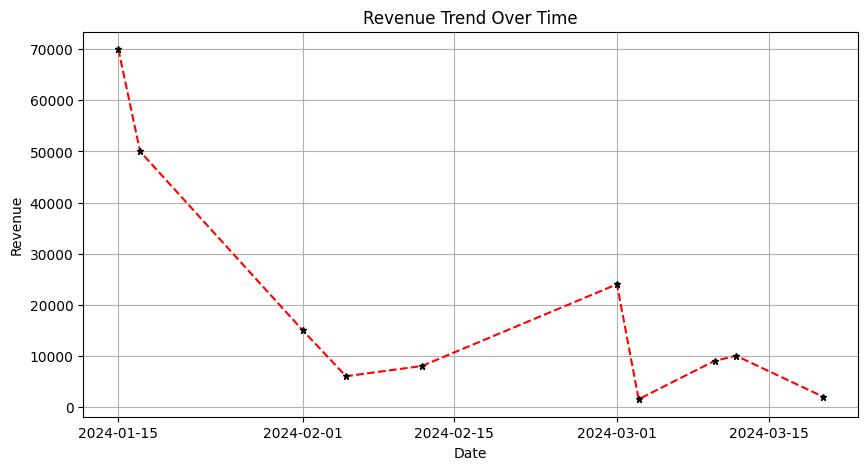

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sales_trend.index,sales_trend.values,marker = '*',markersize = 5,markerfacecolor = 'black',markeredgecolor='black',color = 'red',linestyle = "--")
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

## Sales By Category

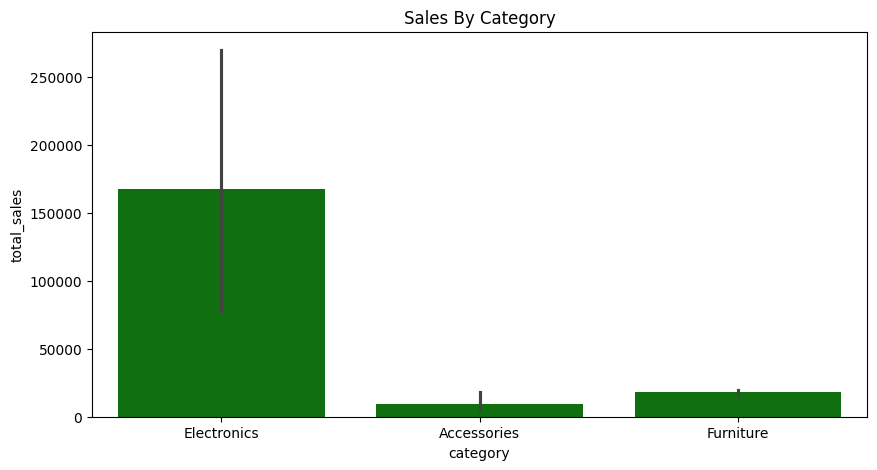

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='category',y='total_sales',data = df,estimator = np.sum,color='green')
plt.title("Sales By Category")
plt.show()

## Top 5 Customers

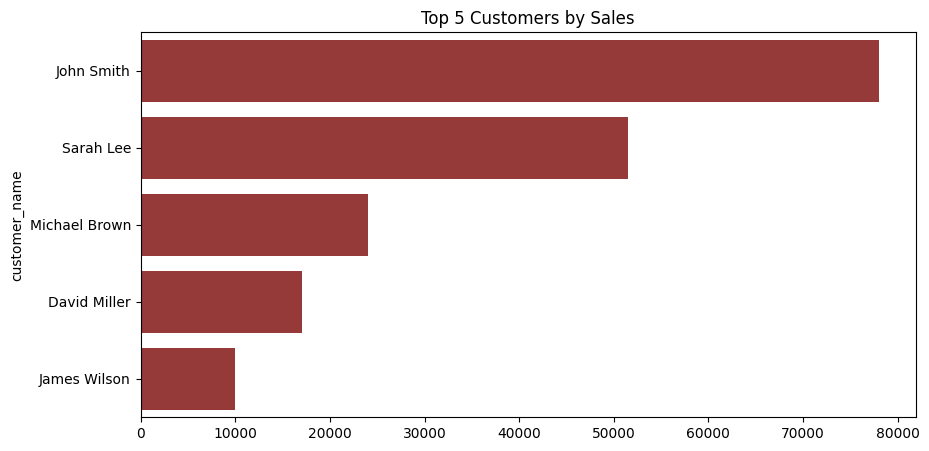

In [35]:
top_customers = df.groupby('customer_name')['total_sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values,y=top_customers.index,color='brown')
plt.title("Top 5 Customers by Sales")
plt.show()

## Distribution of Sales Amount

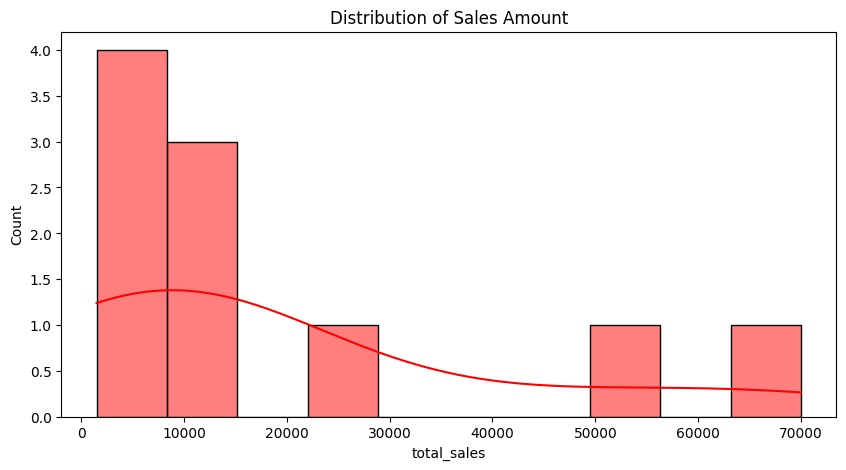

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_sales'],bins = 10,kde=True,color='red')
plt.title("Distribution of Sales Amount")
plt.show()

In [38]:
conn.close()

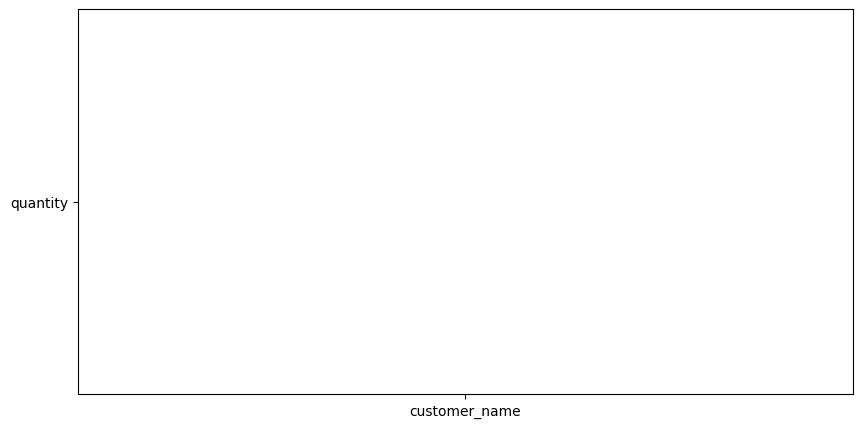

In [41]:
plt.figure(figsize=(10,5))
plt.bar(x='customer_name',height='quantity')
plt.show()